In [2]:
#Importing all the dependencies needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [3]:

#reading the csv file and assigning it to a variable

e_df=pd.read_csv("D:\\Datasets\\Ecommerce_Dataset.csv")

In [4]:
#checking the columns in the dataset
e_df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
#Checking if any Null Values is present in the dataset
print(e_df.isnull().sum(),end="\n")

print(e_df.isna().sum())
print(e_df.duplicated().sum())


Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64
Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64
0


#This shows us that no duplicates or null values are present in the dataset


In [5]:
#get additional info about the data
e_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


Text(0, 0.5, 'Yearly Amount Spent')

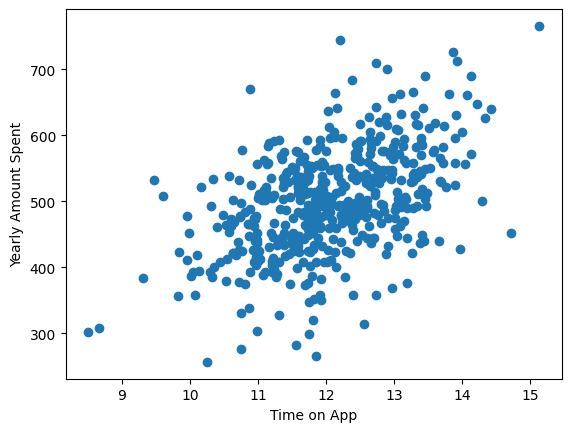

In [6]:

#Plot the relationship of Time on app and the amount spent by the user annually

plt.scatter(e_df['Time on App'].values,e_df['Yearly Amount Spent'].values)
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")




Text(0, 0.5, 'Yearly Amount Spent')

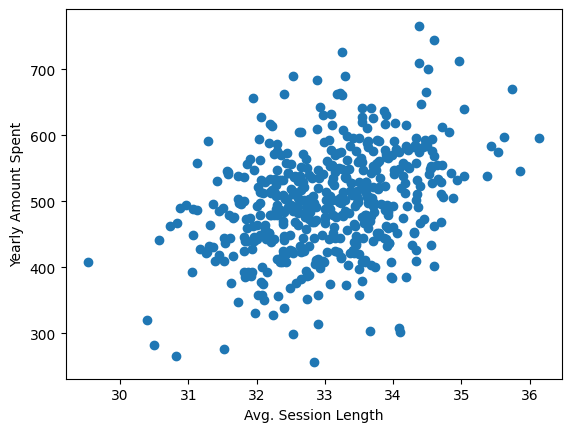

In [9]:
#Plot the relationship of Time on Website and the amount spent by the user annually


plt.scatter(e_df['Avg. Session Length'].values,e_df['Yearly Amount Spent'].values)
plt.xlabel("Avg. Session Length")
plt.ylabel("Yearly Amount Spent")

Text(0, 0.5, 'Yearly Amount Spent')

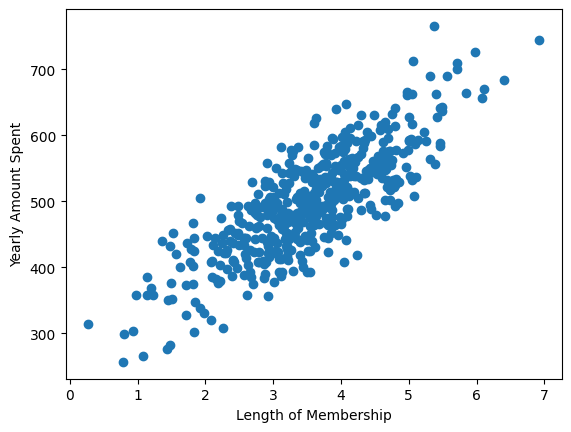

In [8]:
#Plot the relationship of Length Of Membership and the amount spent by the user annually

plt.scatter(e_df['Length of Membership'].values,e_df['Yearly Amount Spent'].values)
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")

            From the above plots , it can be seen that the total amount spent by each user annually is linearly dependent on Time on App, Time on Website and Length of Membership.

In [11]:
#Splitting the data into training set and testing set
x=e_df[['Avg. Session Length','Time on App','Length of Membership']].values
y=e_df.iloc[:,7].values



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)



In [12]:
# Creating An instance of the linear regression model

model=LinearRegression()

#Fitting The Train Data To The Model
model.fit(x_train,y_train)



LinearRegression()

In [13]:
#Check The coefficients and intercept

w=model.coef_
b=model.intercept_



In [20]:
#Testing The Prediction Model with the test dataset

predicted_values=model.predict(x_test)

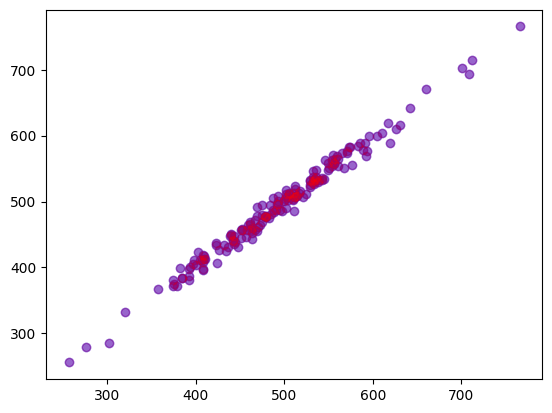

In [21]:
#Check the relationship of the predicted values and the expected values

plt.scatter(x=y_test,y=predicted_values,c='blue',label='Actual',alpha=0.5)
plt.scatter(x=y_test,y=predicted_values,c='red',label = 'Predicted',alpha=0.2)

In [24]:
#Display the metrics Regarding The Prediction 

print("Mean Squared Error : ",mean_squared_error(y_test,predicted_values))
print("R-Squared Score : ",r2_score(y_test,predicted_values))


Mean Squared Error :  90.77404869215167
R-Squared Score :  0.9856902571855877



Hence, The model performs quite well on the data , with an  MSE of 90 and R^2 closer to 1.
    